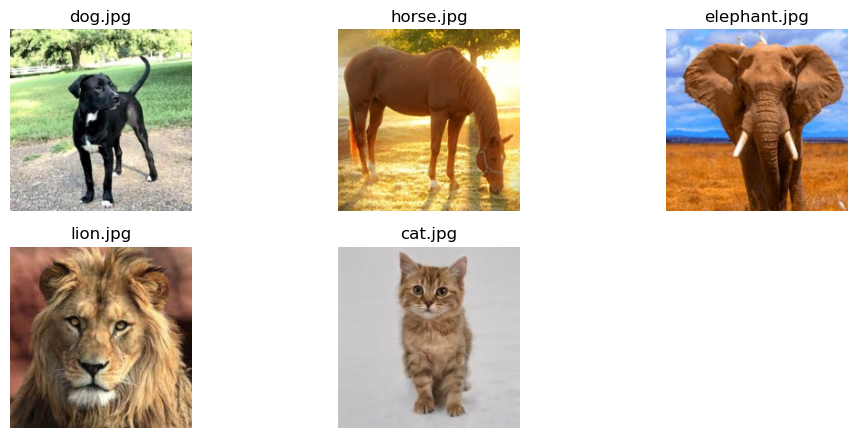

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/animals/inf'
image=[]
animal=[]
for j in os.listdir(path):
    img=cv2.imread(os.path.join(path,j))
    img=cv2.resize(img,(200,200))
    image.append(img)
    animal.append(j)
plt.figure(figsize=(12,8))
c=1
for i in range(0,len(image)):
    plt.subplot(3,3,c)
    plt.imshow(np.array(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB)))
    plt.title(animal[i])
    plt.axis('off')
    c+=1

In [9]:
path = '/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/animals/train'
classes = {'cat': 0, 'dog': 1, 'elephant':2,'horse':3,'lion':4}
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j))
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [10]:
path = '/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/animals/val'
classes = {'cat': 0, 'dog': 1, 'elephant':2,'horse':3,'lion':4}
X_test = []
Y_test = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j))
        img = cv2.resize(img, (200, 200))
        X_test.append(img)
        Y_test.append(classes[cls])

In [11]:
X = np.array(X)
Y = np.array(Y)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [12]:
X = X.reshape(X.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)
X=X.astype('float32')
X_test=X_test.astype('float32')
X/=255
X_test/=255

In [18]:
from tensorflow.keras.utils import to_categorical
Y, Y_test = to_categorical(Y), to_categorical(Y_test)

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
model = Sequential()
model.add(Input(shape=(200,200,3)))
# convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(5, activation='softmax'))

In [70]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [71]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │     5,120,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,213,637 (19.89 MB)

 Trainable params: 5,213,637 (19.89 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# import visualkeras
# visualkeras.layered_view(model, legend=True)
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [72]:
model.fit(X, Y, batch_size=32, epochs=10,validation_data=(X_test, Y_test))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 174s 409ms/step - accuracy: 0.3591 - loss: 1.6193 - val_accuracy: 0.6994 - val_loss: 0.7757
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 171s 405ms/step - accuracy: 0.6951 - loss: 0.7849 - val_accuracy: 0.7735 - val_loss: 0.5782
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 171s 405ms/step - accuracy: 0.7528 - loss: 0.6349 - val_accuracy: 0.7221 - val_loss: 0.6290
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 171s 405ms/step - accuracy: 0.7764 - loss: 0.5592 - val_accuracy: 0.8363 - val_loss: 0.4630
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 170s 403ms/step - accuracy: 0.8202 - loss: 0.4674 - val_accuracy: 0.8390 - val_loss: 0.4253
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 174s 411ms/step - accuracy: 0.8434 - loss: 0.3891 - val_accuracy: 0.8370 - val_loss: 0.4445
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 184s 437ms/step - accuracy: 0.8781 - loss: 0.3216 - val_accuracy: 0.8484 - val_loss: 0.4315
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 169s 401ms/step - accuracy: 0.8962 -

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import BatchNormalization, RandomFlip,RandomRotation,RandomZoom, Input
model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])
# convolutional layer
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

# flatten output of conv
model1.add(Flatten())

# hidden layer
model1.add(Dense(64, activation='relu'))
# output layer
model1.add(Dense(5, activation='softmax'))

In [78]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [79]:
model1.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 200, 200, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │     5,120,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,214,533 (19.89 MB)

 Trainable params: 5,214,085 (19.89 MB)

 Non-trainable params: 448 (1.75 KB)

In [80]:
model1.fit(X, Y, batch_size=32,epochs=10,validation_data=(X_test, Y_test))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 472ms/step - accuracy: 0.3400 - loss: 2.9343 - val_accuracy: 0.3307 - val_loss: 3.9911
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 198s 469ms/step - accuracy: 0.4047 - loss: 1.2798 - val_accuracy: 0.4937 - val_loss: 1.1808
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 198s 470ms/step - accuracy: 0.5067 - loss: 1.1205 - val_accuracy: 0.5671 - val_loss: 1.0677
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 196s 465ms/step - accuracy: 0.5817 - loss: 0.9794 - val_accuracy: 0.6874 - val_loss: 0.8670
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 198s 469ms/step - accuracy: 0.6728 - loss: 0.8001 - val_accuracy: 0.6814 - val_loss: 0.7808
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 196s 465ms/step - accuracy: 0.7212 - loss: 0.6742 - val_accuracy: 0.7989 - val_loss: 0.5822
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 197s 467ms/step - accuracy: 0.7556 - loss: 0.6195 - val_accuracy: 0.7508 - val_loss: 0.7683
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 195s 463ms/step - accuracy: 0.7858 -

### 

In [ ]:
dict1={0:'cat',1:'dog',2:'elephant',3:'horse',4:'lion'}